In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_ev_data():
    if os.path.isfile('EV_Charging_Stations.csv'):
        print('Found file')
        # If csv file exists read in data from csv file.
        df = pd.read_csv('EV_Charging_Stations.csv', index_col=0)
    else:
        print('Retrieving file...\n')
        # Read fresh data from db into a dataframe
        df = new_telco_data()
        # Cache data
        df.to_csv('EV_Charging_Stations.csv')
        print('\nFile retrieved.')
    return df

In [3]:
df = get_ev_data()

Found file


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, -95.372854 to -96.753363
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Y                   2927 non-null   float64
 1   Station_Name        2927 non-null   object 
 2   City                2927 non-null   object 
 3   Street_Address      2927 non-null   object 
 4   ZIP                 2927 non-null   int64  
 5   ev_connector_types  2927 non-null   object 
 6   ev_network          2927 non-null   object 
 7   ev_network_web      2715 non-null   object 
 8   Level1_Plugs        2927 non-null   int64  
 9   Level2_Plugs        2927 non-null   int64  
 10  DCFC_Plugs          2927 non-null   int64  
 11  Total_Plugs         2927 non-null   int64  
 12  Level2              2927 non-null   object 
 13  DCFC                2927 non-null   object 
 14  Tesla               2927 non-null   object 
 15  recid               2927 non-null   int64  
 

In [5]:
df.shape

(2927, 17)

In [6]:
df.columns.to_list()

['Y',
 'Station_Name',
 'City',
 'Street_Address',
 'ZIP',
 'ev_connector_types',
 'ev_network',
 'ev_network_web',
 'Level1_Plugs',
 'Level2_Plugs',
 'DCFC_Plugs',
 'Total_Plugs',
 'Level2',
 'DCFC',
 'Tesla',
 'recid',
 'ESRI_OID']

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.head()

,y,station_name,city,street_address,zip,ev_connector_types,ev_network,ev_network_web,level1_plugs,level2_plugs,dcfc_plugs,total_plugs,level2,dcfc,tesla,recid,esri_oid
X,,,,,,,,,,,,,,,,,
-95.372854,29.756604,BROOKFIELD PROP 300 CLAY STAT1,Houston,300 Clay St,77002,J1772,ChargePoint Network,http://www.chargepoint.com/,0,2,0,2,Level2,No,No,358,2136
-97.759109,30.206145,Clay Cooley Nissan,Austin,4914 S IH-35,78745,CHADEMOJ1772,Non-Networked,NaN,0,2,1,3,Level2,DCFC,No,379,2626
-99.771463,32.408909,McGavock Nissan - Abilene,Abilene,818 E Overland Trail,79606,J1772,Non-Networked,NaN,0,1,0,1,Level2,No,No,380,1004
-101.938937,35.159354,McGavock Nissan - Amarillo,Amarillo,4700 S Soncy Rd,79119,J1772,Non-Networked,NaN,0,2,0,2,Level2,No,No,381,2027
-97.087169,32.676458,Don Davis Nissan,Arlington,1320 E Interstate 20,76018,J1772,Non-Networked,NaN,0,1,0,1,Level2,No,No,382,1005


In [9]:
data = df.y
data

X
-95.372854     29.756604
-97.759109     30.206145
-99.771463     32.408909
-101.938937    35.159354
-97.087169     32.676458
                 ...    
-98.871720     30.251886
-95.343424     29.720583
-106.302552    31.771565
-106.515352    31.852003
-96.753363     32.861917
Name: y, Length: 2927, dtype: float64

In [10]:
index_values = df.index

In [11]:
df_c = pd.DataFrame(data, index=index_values)
df_c

,y
X,
-95.372854,29.756604
-97.759109,30.206145
-99.771463,32.408909
-101.938937,35.159354
-97.087169,32.676458
...,...
-98.871720,30.251886
-95.343424,29.720583
-106.302552,31.771565


In [12]:
# Create the 'Coordinates' column by combining index and 'Y' column values
df['coordinates'] = df.index.astype(str) + ', ' + df['y'].astype(str)
df['coordinates']

# Reset the index to make 'Coordinates' a regular column
df = df.reset_index(inplace=False)

# drop 'X' and 'Y' columns
df = df.drop(columns=(['X', 'y']))

# Drop duplicates based on all columns
df = df.drop_duplicates()

In [13]:
# see df
df.head()

,station_name,city,street_address,zip,ev_connector_types,ev_network,ev_network_web,level1_plugs,level2_plugs,dcfc_plugs,total_plugs,level2,dcfc,tesla,recid,esri_oid,coordinates
0,BROOKFIELD PROP 300 CLAY STAT1,Houston,300 Clay St,77002,J1772,ChargePoint Network,http://www.chargepoint.com/,0,2,0,2,Level2,No,No,358,2136,"-95.372854, 29.756604"
1,Clay Cooley Nissan,Austin,4914 S IH-35,78745,CHADEMOJ1772,Non-Networked,NaN,0,2,1,3,Level2,DCFC,No,379,2626,"-97.759109, 30.206145"
2,McGavock Nissan - Abilene,Abilene,818 E Overland Trail,79606,J1772,Non-Networked,NaN,0,1,0,1,Level2,No,No,380,1004,"-99.771463, 32.4089090000001"
3,McGavock Nissan - Amarillo,Amarillo,4700 S Soncy Rd,79119,J1772,Non-Networked,NaN,0,2,0,2,Level2,No,No,381,2027,"-101.938937, 35.1593540000001"
4,Don Davis Nissan,Arlington,1320 E Interstate 20,76018,J1772,Non-Networked,NaN,0,1,0,1,Level2,No,No,382,1005,"-97.087169, 32.676458"


In [14]:
# Group coordinates by the same city
grouped = df.groupby('city')

# Print the city and the number of unique coordinates in each group
for city, group in grouped:
    num_coordinates = len(group)
    unique_group = group.drop_duplicates(subset=['coordinates'])  # Change 'Y' to 'Coordinates'
    num_unique_coordinates = len(unique_group)
    
    print(f"City: {city}, Number of Unique Coordinates: {num_unique_coordinates}\n\n\n")
    print(unique_group)
    print("\n\n\n--------------------------\n\n")
df.head()

City: Abbott, Number of Unique Coordinates: 1



                         station_name    city street_address    zip  \
1672  Abbott, TX - Tesla Supercharger  Abbott           I-35  76621   

     ev_connector_types ev_network                      ev_network_web  \
1672              TESLA      Tesla  https://www.tesla.com/supercharger   

      level1_plugs  level2_plugs  dcfc_plugs  total_plugs level2  dcfc  tesla  \
1672             0             0           8            8     No  DCFC  Tesla   

      recid  esri_oid                          coordinates  
1672   3113      2722  -97.0909809999999, 31.8989980000001  



--------------------------


City: Abilene, Number of Unique Coordinates: 4



                                   station_name     city  \
2                     McGavock Nissan - Abilene  Abilene   
236       Hilton Garden Inn - Tesla Destination  Abilene   
627   Abilene Eye Institute - Tesla Destination  Abilene   
2695   Holiday Inn Abilene - North College Area  Abi

,station_name,city,street_address,zip,ev_connector_types,ev_network,ev_network_web,level1_plugs,level2_plugs,dcfc_plugs,total_plugs,level2,dcfc,tesla,recid,esri_oid,coordinates
0,BROOKFIELD PROP 300 CLAY STAT1,Houston,300 Clay St,77002,J1772,ChargePoint Network,http://www.chargepoint.com/,0,2,0,2,Level2,No,No,358,2136,"-95.372854, 29.756604"
1,Clay Cooley Nissan,Austin,4914 S IH-35,78745,CHADEMOJ1772,Non-Networked,NaN,0,2,1,3,Level2,DCFC,No,379,2626,"-97.759109, 30.206145"
2,McGavock Nissan - Abilene,Abilene,818 E Overland Trail,79606,J1772,Non-Networked,NaN,0,1,0,1,Level2,No,No,380,1004,"-99.771463, 32.4089090000001"
3,McGavock Nissan - Amarillo,Amarillo,4700 S Soncy Rd,79119,J1772,Non-Networked,NaN,0,2,0,2,Level2,No,No,381,2027,"-101.938937, 35.1593540000001"
4,Don Davis Nissan,Arlington,1320 E Interstate 20,76018,J1772,Non-Networked,NaN,0,1,0,1,Level2,No,No,382,1005,"-97.087169, 32.676458"


In [15]:
df.station_name.value_counts()

station_name
Walgreens                        23
Shell                            18
Buc-ee's                         13
Buc-ee's - Tesla Supercharger    13
Cracker Barrel                    8
                                 ..
RANCHOPALISADES RM - 1            1
PIE AE PUB LOCKHART 1             1
INDIAN CREEK SIC-1                1
BALLANTYNE B-1                    1
TIMBER CREEK CR STATION 1         1
Name: count, Length: 2816, dtype: int64

In [16]:
city_list = df.city.to_list()
city_list = list(set(city_list))
city_list

['Childress',
 'Gonzales',
 'Port Arthur',
 'Madisonville',
 'Kerrville',
 'Rockwall',
 'Waller',
 'Mckinney',
 'Alvin',
 'Waco',
 'Sunnyvale',
 'Grapevine',
 'Palastine',
 'Ganado',
 'Fort Worth',
 'Greenville',
 'Wimberley',
 'Georgetown',
 'Flower Mound',
 'Bedford',
 'Melissa',
 'Friendswood',
 'Belton',
 'Leakey',
 'Groesbeck',
 'DeSoto',
 'Beaumont',
 'Alice',
 'Terrell',
 'Florence',
 'Del Rio',
 'Clyde',
 'Beeville',
 'Midland',
 'Corsicana',
 'Brownsville',
 'Henrietta',
 'Marshall',
 'Bastrop',
 'Sachse',
 'Elgin',
 'Shenandoah',
 'Hillsboro',
 'Marion',
 'Weatherford',
 'Chandler',
 'Bandera',
 'Conroe',
 'South PaDre Island',
 'MCALLEN',
 'EL PASO',
 'Athens',
 'Keller',
 'garland',
 'Hurst',
 'CARTHAGE',
 'Addison',
 'Nolanville',
 'CEDAR PARK',
 'McDade',
 'DENTON',
 'Brazoria',
 'Goldthwaite',
 'George West',
 'Wylie',
 'Floresville',
 'Lufkin',
 'White Settlement',
 'Brookshire',
 'Sealy',
 'Victoria',
 'West Lake Hills',
 'Los Indios',
 'Burkburnett',
 'Deer Park',
 'S

In [17]:
cities = df.groupby('city', as_index=False).first()

cities = cities.drop(columns=[ 'station_name',	'street_address',	'zip',	'ev_connector_types',	'ev_network',	'ev_network_web',	'level1_plugs',	'level2_plugs',	'dcfc_plugs',	'total_plugs',	'level2', 'dcfc', 'tesla',	'recid', 'esri_oid'])

cities.nunique

<bound method DataFrame.nunique of               city                          coordinates
0           Abbott  -97.0909809999999, 31.8989980000001
1          Abilene         -99.771463, 32.4089090000001
2          Addison          -96.82003, 32.9507400000001
3    Alamo Heights                -98.463377, 29.470983
4            Alice                -98.068793, 27.749065
..             ...                                  ...
343      Wimberley              -98.0922896, 29.9758381
344        Woodway        -97.1958529999999, 31.5091657
345          Wylie                -96.589845, 33.009355
346         austin         -97.8411809999999, 30.221503
347        garland  -96.6408049999999, 32.9594720000001

[348 rows x 2 columns]>

In [18]:
df.head(2)

,station_name,city,street_address,zip,ev_connector_types,ev_network,ev_network_web,level1_plugs,level2_plugs,dcfc_plugs,total_plugs,level2,dcfc,tesla,recid,esri_oid,coordinates
0,BROOKFIELD PROP 300 CLAY STAT1,Houston,300 Clay St,77002,J1772,ChargePoint Network,http://www.chargepoint.com/,0,2,0,2,Level2,No,No,358,2136,"-95.372854, 29.756604"
1,Clay Cooley Nissan,Austin,4914 S IH-35,78745,CHADEMOJ1772,Non-Networked,NaN,0,2,1,3,Level2,DCFC,No,379,2626,"-97.759109, 30.206145"


In [19]:
# TODO: Relook at the calculation; shouldn be a multiple sum of plugs. need to groupby or do an aggregation
df['sum_of_plugs'] = df.groupby('city')['total_plugs'].transform('sum')
df['sum_of_plugs'] 

0        961
1       1338
2          7
3         41
4         90
        ... 
2922      15
2923     961
2924      80
2925      80
2926     545
Name: sum_of_plugs, Length: 2927, dtype: int64

In [20]:
# Calculate the sum of plugs for each unique city

sum_of_plugs_per_city = df.groupby('city')['sum_of_plugs'].sum().reset_index()
largest_cities = sum_of_plugs_per_city[sum_of_plugs_per_city['sum_of_plugs'] > 100000]
smallest_cities = sum_of_plugs_per_city[sum_of_plugs_per_city['sum_of_plugs'] < 2]

sum_of_plugs_per_city, largest_cities, smallest_cities

(              city  sum_of_plugs
 0           Abbott             8
 1          Abilene            28
 2          Addison             8
 3    Alamo Heights            16
 4            Alice            11
 ..             ...           ...
 343      Wimberley            20
 344        Woodway             2
 345          Wylie             6
 346         austin             2
 347        garland             1
 
 [348 rows x 2 columns],
         city  sum_of_plugs
 14    Austin        826884
 85    Dallas        122080
 153  Houston        312325,
                    city  sum_of_plugs
 9              Anderson             1
 16            BALLINGER             1
 17             BAY CITY             1
 35                Brady             1
 44             CARTHAGE             1
 46             CLEBURNE             1
 49               Canyon             1
 66              Coleman             1
 71             Comanche             1
 73               Concan             1
 84              Dalhar

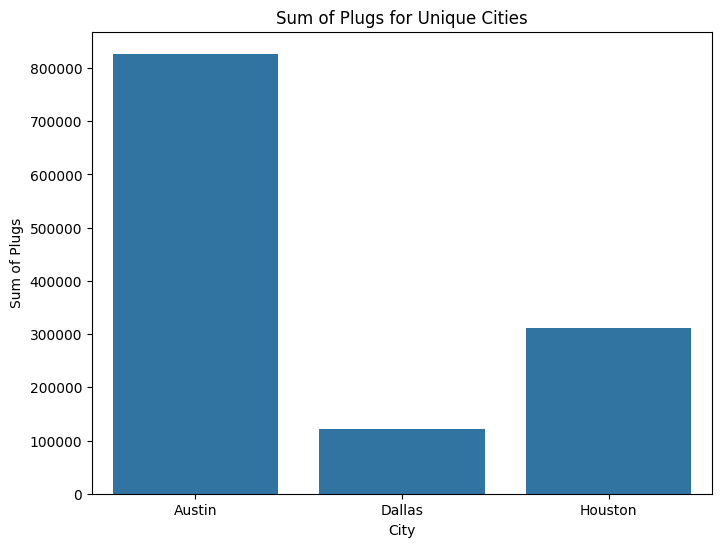

In [21]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=largest_cities , x='city', y='sum_of_plugs')
plt.title('Sum of Plugs for Unique Cities')
plt.xlabel('City')
plt.ylabel('Sum of Plugs')
plt.show()

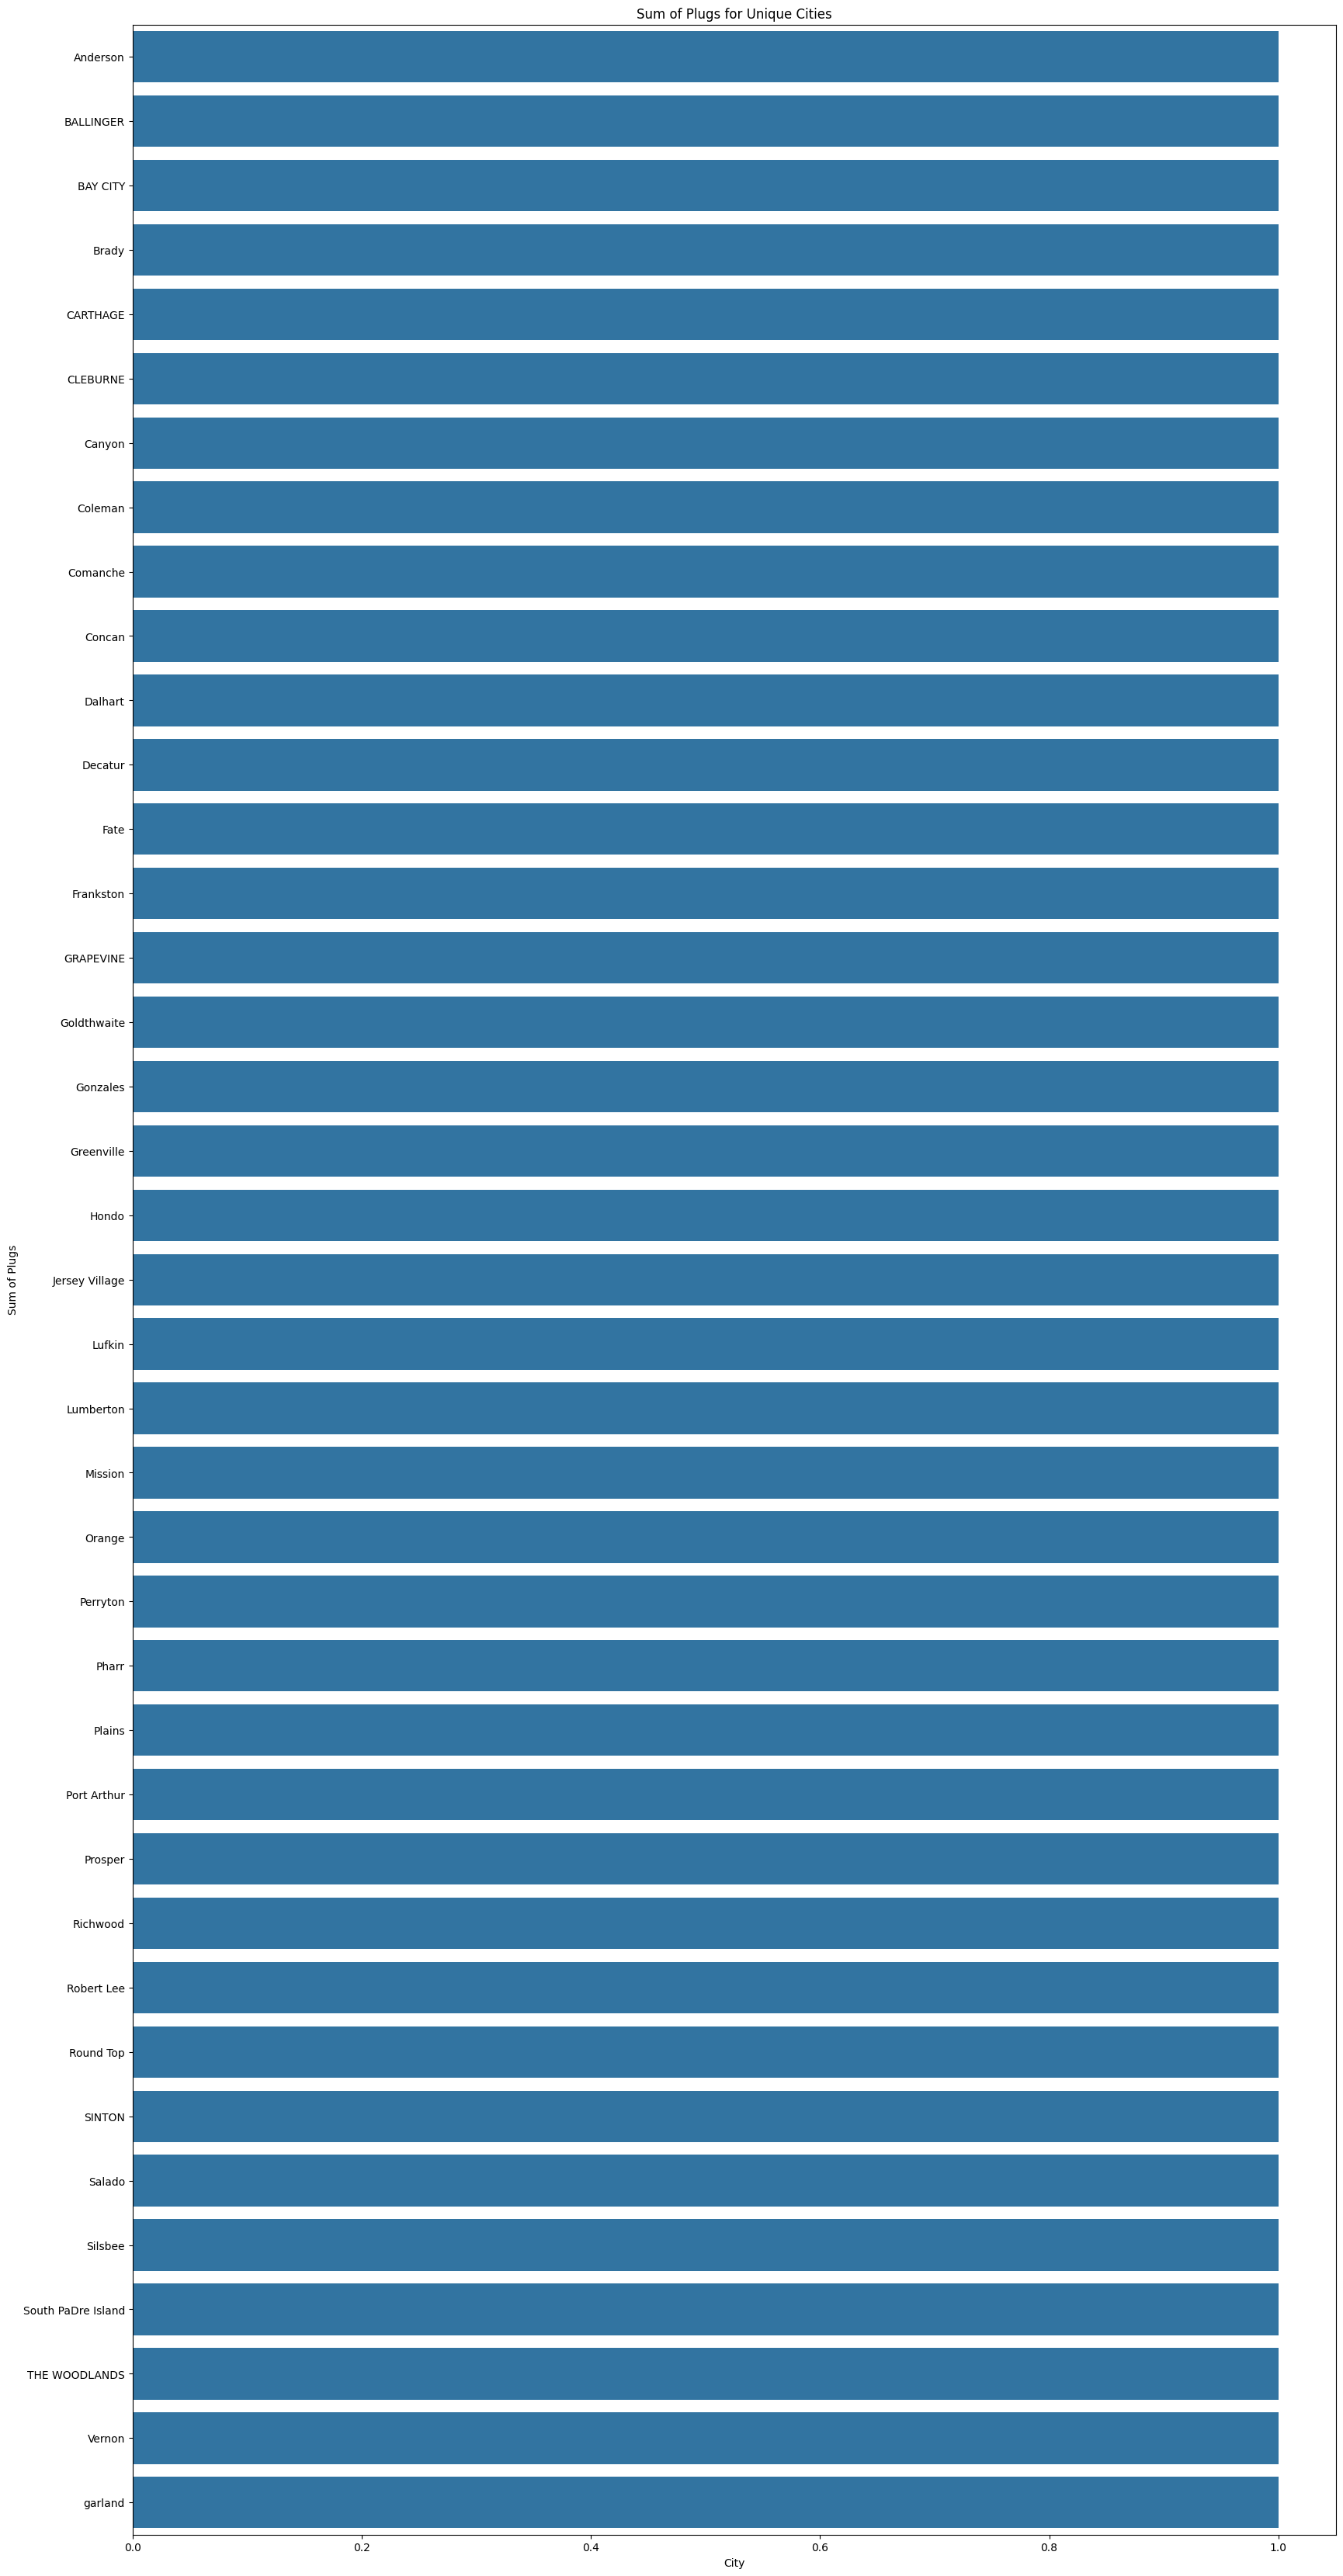

In [22]:
# Create a bar plot
plt.figure(figsize=(20, 42))
sns.barplot(data=smallest_cities , x='sum_of_plugs', y='city')
plt.title('Sum of Plugs for Unique Cities')
plt.xlabel('City')
plt.ylabel('Sum of Plugs')
plt.show()

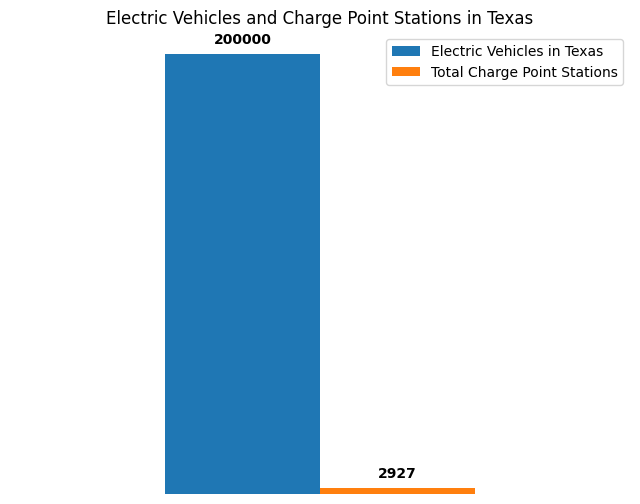

In [23]:
data = {
    'Electric Vehicles in Texas': [200000],
    'Total Charge Point Stations': [2_927]
}

df = pd.DataFrame(data)


ax = df.plot(kind='bar', figsize=(8, 6))
ax.set_title('Electric Vehicles and Charge Point Stations in Texas')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks([])  # Empty list to remove x-axis ticks
plt.yticks([])

ax.tick_params(axis='y', length=0)

for i, bar in enumerate(ax.patches):
    value = df.iloc[0, i]  # Get the value from the DataFrame
    height = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    y_pos = bar.get_y() + height + 5
    
    ax.annotate(f'{value:.0f}',  # Use the actual value from the DataFrame
                xy=(x_pos, y_pos),
                xytext=(0, 5),  # Adjust the vertical offset here
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.show()

# Testing functions

In [24]:
import wrangle as w

In [25]:
df = w.get_ev()

Found file


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, -95.372854 to -96.753363
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Y                   2927 non-null   float64
 1   Station_Name        2927 non-null   object 
 2   City                2927 non-null   object 
 3   Street_Address      2927 non-null   object 
 4   ZIP                 2927 non-null   int64  
 5   ev_connector_types  2927 non-null   object 
 6   ev_network          2927 non-null   object 
 7   ev_network_web      2715 non-null   object 
 8   Level1_Plugs        2927 non-null   int64  
 9   Level2_Plugs        2927 non-null   int64  
 10  DCFC_Plugs          2927 non-null   int64  
 11  Total_Plugs         2927 non-null   int64  
 12  Level2              2927 non-null   object 
 13  DCFC                2927 non-null   object 
 14  Tesla               2927 non-null   object 
 15  recid               2927 non-null   int64  
 

In [27]:
df = w.clean_ev(df)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   station_name        2927 non-null   object
 1   city                2927 non-null   object
 2   street_address      2927 non-null   object
 3   zip                 2927 non-null   int64 
 4   ev_connector_types  2927 non-null   object
 5   ev_network          2927 non-null   object
 6   ev_network_web      2715 non-null   object
 7   level1_plugs        2927 non-null   int64 
 8   level2_plugs        2927 non-null   int64 
 9   dcfc_plugs          2927 non-null   int64 
 10  total_plugs         2927 non-null   int64 
 11  level2              2927 non-null   object
 12  dcfc                2927 non-null   object
 13  tesla               2927 non-null   object
 14  recid               2927 non-null   int64 
 15  esri_oid            2927 non-null   int64 
 16  coordinates         2927

# Functions operational

In [29]:
df.head()

,station_name,city,street_address,zip,ev_connector_types,ev_network,ev_network_web,level1_plugs,level2_plugs,dcfc_plugs,total_plugs,level2,dcfc,tesla,recid,esri_oid,coordinates
0,BROOKFIELD PROP 300 CLAY STAT1,Houston,300 Clay St,77002,J1772,ChargePoint Network,http://www.chargepoint.com/,0,2,0,2,Level2,No,No,358,2136,"-95.372854, 29.756604"
1,Clay Cooley Nissan,Austin,4914 S IH-35,78745,CHADEMOJ1772,Non-Networked,NaN,0,2,1,3,Level2,DCFC,No,379,2626,"-97.759109, 30.206145"
2,McGavock Nissan - Abilene,Abilene,818 E Overland Trail,79606,J1772,Non-Networked,NaN,0,1,0,1,Level2,No,No,380,1004,"-99.771463, 32.4089090000001"
3,McGavock Nissan - Amarillo,Amarillo,4700 S Soncy Rd,79119,J1772,Non-Networked,NaN,0,2,0,2,Level2,No,No,381,2027,"-101.938937, 35.1593540000001"
4,Don Davis Nissan,Arlington,1320 E Interstate 20,76018,J1772,Non-Networked,NaN,0,1,0,1,Level2,No,No,382,1005,"-97.087169, 32.676458"


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   station_name        2927 non-null   object
 1   city                2927 non-null   object
 2   street_address      2927 non-null   object
 3   zip                 2927 non-null   int64 
 4   ev_connector_types  2927 non-null   object
 5   ev_network          2927 non-null   object
 6   ev_network_web      2715 non-null   object
 7   level1_plugs        2927 non-null   int64 
 8   level2_plugs        2927 non-null   int64 
 9   dcfc_plugs          2927 non-null   int64 
 10  total_plugs         2927 non-null   int64 
 11  level2              2927 non-null   object
 12  dcfc                2927 non-null   object
 13  tesla               2927 non-null   object
 14  recid               2927 non-null   int64 
 15  esri_oid            2927 non-null   int64 
 16  coordinates         2927

In [31]:
df.shape

(2927, 17)

In [32]:
df_c = df.ev_connector_types.value_counts()

In [33]:
# List of connector types to combine
connector_types_to_combine_a = ['J1772']
connector_types_to_combine_b = ['J1772COMBO', 'J1772J1772COMBO']
connector_types_to_combine_c = ['TESLA', 'J1772TESLA']
connector_types_to_combine_d = ['CHADEMOJ1772', 'CHADEMOJ1772J1772COMBO']
connector_types_to_isolate_b = ['J1772NEMA515']

# Create a new Series that combines the counts
sae_connector = df_c[connector_types_to_combine_a].sum()
css_connector = df_c[connector_types_to_combine_b].sum()
tesla_connector =  df_c[connector_types_to_combine_c].sum()
chade_connector = df_c[connector_types_to_combine_d].sum()
# nema_515_connector = df[connector_types_to_isolate_b].sum()

df_c['sae_connector'] = sae_connector
df_c['tesla_connector'] = tesla_connector
df_c['css_connector'] = css_connector
df_c['chade_connector'] = chade_connector
# df['nema_515_connector'] = nema_515_connector

In [34]:
df_c

ev_connector_types
J1772                     2198
TESLA                      307
CHADEMOJ1772COMBO          161
J1772TESLA                 126
J1772COMBO                  69
CHADEMOJ1772J1772COMBO      49
CHADEMOJ1772                10
J1772J1772COMBO              4
J1772NEMA515                 3
sae_connector             2198
tesla_connector            433
css_connector               73
chade_connector             59
Name: count, dtype: int64

In [35]:
indexes_to_drop = ['J1772', 'TESLA', 'CHADEMOJ1772COMBO', 'J1772TESLA', 'J1772COMBO', 'CHADEMOJ1772J1772COMBO', 'CHADEMOJ1772', 'J1772J1772COMBO', 'J1772NEMA515']
df_c = df_c.drop(indexes_to_drop)

In [36]:
df_c

ev_connector_types
sae_connector      2198
tesla_connector     433
css_connector        73
chade_connector      59
Name: count, dtype: int64

In [39]:
def plot_ev(data):
    plt.figure(figsize=(10, 6))

    max_value = df_c.sae_connector

    cols = ['lightgrey' if (x < max(data)) else 'lightgreen' for x in data]
    ax = sns.barplot(x = data, y = data.index, palette=cols)
    sns.despine(left=True, bottom=True, trim=True)
    plt.xticks([])  # Empty list to remove x-axis ticks
    plt.gca().set_xlabel('')
    plt.title('Electric Vehicle Connector Types in Texas')

    custom_labels = ['SAE J1772 Charger     ', 'CCS (Combo) Connector     ', 'CHAdeMO Connector     ',
                     'Tesla Connector     ']
    
    ax.set_yticklabels(custom_labels, color='grey')

    for label in ax.get_yticklabels():
        if label.get_text() == 'SAE J1772 Charger     ':
            label.set_fontweight('bold')
    
    ax.tick_params(axis='y', length=0)
    
    for i, bar in enumerate(ax.patches):
        width = bar.get_width()
        height = bar.get_height()
        x_pos = bar.get_x() + width  # Adjusted x-coordinate
        y_pos = bar.get_y() + height / 2  # Centered y-coordinate
        
        font_weight = 'bold' if width == max_value else 'normal'
        
        ax.annotate(f'{width:.0f}',
                    xy=(x_pos, y_pos),
                    xytext=(5, 0),  # Adjust the horizontal offset here
                    textcoords="offset points",
                    ha='left', va='center', fontsize=10, color='black', weight=font_weight)

/var/folders/hz/r10rvhgs41x5bxdmg79hksdw0000gn/T/ipykernel_30189/1266154431.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data, y = data.index, palette=cols)


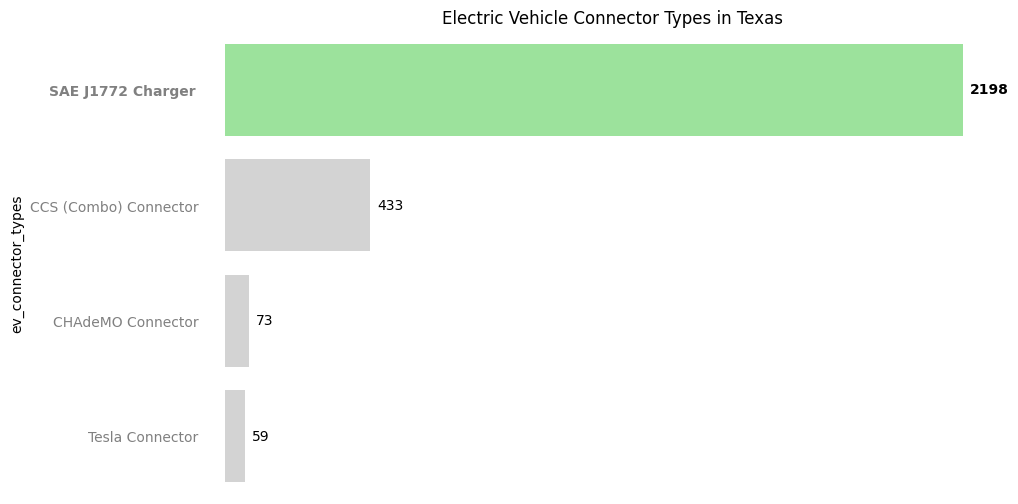

In [40]:
plot_ev(df_c)
plt.show()

In [41]:
df.head()

,station_name,city,street_address,zip,ev_connector_types,ev_network,ev_network_web,level1_plugs,level2_plugs,dcfc_plugs,total_plugs,level2,dcfc,tesla,recid,esri_oid,coordinates
0,BROOKFIELD PROP 300 CLAY STAT1,Houston,300 Clay St,77002,J1772,ChargePoint Network,http://www.chargepoint.com/,0,2,0,2,Level2,No,No,358,2136,"-95.372854, 29.756604"
1,Clay Cooley Nissan,Austin,4914 S IH-35,78745,CHADEMOJ1772,Non-Networked,NaN,0,2,1,3,Level2,DCFC,No,379,2626,"-97.759109, 30.206145"
2,McGavock Nissan - Abilene,Abilene,818 E Overland Trail,79606,J1772,Non-Networked,NaN,0,1,0,1,Level2,No,No,380,1004,"-99.771463, 32.4089090000001"
3,McGavock Nissan - Amarillo,Amarillo,4700 S Soncy Rd,79119,J1772,Non-Networked,NaN,0,2,0,2,Level2,No,No,381,2027,"-101.938937, 35.1593540000001"
4,Don Davis Nissan,Arlington,1320 E Interstate 20,76018,J1772,Non-Networked,NaN,0,1,0,1,Level2,No,No,382,1005,"-97.087169, 32.676458"
